In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset

In [3]:
data = pd.read_csv('/Users/tech/Documents/Jupyter Notebook/DataSet/Electricity/powerconsumption.csv')

# Preprocess the data

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'])  
data.set_index('Datetime', inplace=True)

# Define feature columns and target columns

In [5]:
feature_columns = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']
target_columns = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Split features and targets

In [6]:
X = data[feature_columns]
y = data[target_columns]

# Split the data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model

In [9]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3)  # Output layer with 3 outputs for each PowerConsumption zone
])

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model

In [11]:
epochs = 50 
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 160128832.0000 - val_loss: 31716602.0000
Epoch 2/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 31502146.0000 - val_loss: 31595596.0000
Epoch 3/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30761768.0000 - val_loss: 31062202.0000
Epoch 4/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30595676.0000 - val_loss: 29749890.0000
Epoch 5/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30178212.0000 - val_loss: 30027890.0000
Epoch 6/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30441102.0000 - val_loss: 30706244.0000
Epoch 7/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30586012.0000 - val_loss: 30001708.0000
Epoch 8/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30402048.0000 - val_loss: 29770662.0000
Epoch 9/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30062674.0000 - val_loss: 29670452.0000
Epoch 10/50
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29872766.0000 - va

# Evaluate the model

In [12]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 25739762.380221397


# Plot the training and validation loss

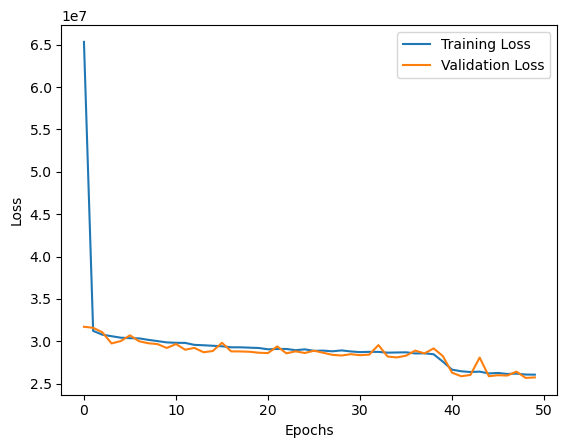

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate evaluation metrics

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 25739762.380221397
Root Mean Squared Error (RMSE): 5073.436939612179
Mean Absolute Error (MAE): 3912.8006032478647
R-squared (R²): 0.3530988282629561
